# Support Vector Machines Review

For the last three decades, studies on machine learning resulted in very advanced classifiers. One of the most studied machine learning algorithm is support vector machines. It is a vector space classification algorithm which tries to place a decision boundary that is in the middle of the class boundary. That way decision boundary would not favor any of the classes. Although support vector machines algorithm is very sophisticated, it does not always give better results than other algorithms, when the training data is large enough. However, when there is little training data, SVMs are the first choice amongst researchers.


## Linear Support Vector Machines


In classification, if we have two linearly separable classes as shown in Fig. 1., there would be an infinite number of lines(decision boundary) that can separate two classes. Depending on the test data, each of the decision boundaries would give different accuracy. The general assumption of the support vector machines is that if we choose a decision boundary which is far away from both of the classes, it would be the decision boundary that gives the best accuracy. In order to do that, SVM finds the two vectors(support vectors) that are closest to the class boundaries of each class, then calculate the line that is in the middle of support vectors. 

<img src="svm.png" width="60%">

\begin{align}
    \text {Fig. 1. Two linearly separable class, separated by decision boundary that is right in the middle of support vectors.}
\end{align}

The distance between support vectors is called <i>margin</i>. If the margin is long, the decision boundary of SVM would give better results when the test data is closer to the decision boundary. However, if the margin is short, decision boundary would give inaccurate result when the test data is closer to decision boundary. It is because the certainty would decrease when the classes are closer in the vector space. 

Since it is computationally intensive to find support vectors and decision boundary, running time complexity $O(|C| \text{ } |D|^3 \text{ } |M_{ave}|)$ is more than other classification algorithms. |C| is the number of classes, |D| is the number of documents and $M_{ave}$ is the average vocabulary of a document.


Let's see an example of linear SVM:

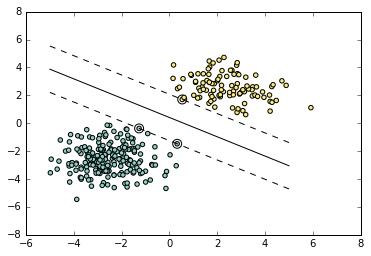

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

number_of_datapoints_x = 200
number_of_datapoints_y = 100
X = np.r_[np.random.randn(number_of_datapoints_x, 2) - [2.5, 2.5], 
          np.random.randn(number_of_datapoints_y, 2) + [2.5, 2.5]] # create 40 separable points
Y = [0] * number_of_datapoints_x + [1] * number_of_datapoints_y

clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# decision boundary 
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)


plt.plot(xx, a * xx - (clf.intercept_[0]) / w[1], "k-") # decision boundary
plt.plot(xx, a * xx + (clf.support_vectors_[0][1] - a * clf.support_vectors_[0][0]), 'k--') # supper vector upper
plt.plot(xx, a * xx + (clf.support_vectors_[-1][1] - a * clf.support_vectors_[-1][0]), 'k--') # supper vector lower 

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set3)

plt.show()


## Nonlinear SVMs

Till now we worked on linearly separable training data. What would happen if we have more complex data that is not perfectly separable with linear SVM. In order to do that, researchers find a mathematical way to separate nonlinear data with SVMs by using kernel trick. Kernels detect the pattern of the data to find decision boundary. There are two popular kernel families around the researcher. First one is polynomial kernels, the second one is radial basis functions(RBF). While polynomial kernels detect quadratic functions, RBF can find both quadratic functions and circles in data.


Let's see an example of nonlinear SVM with RBF kernel:

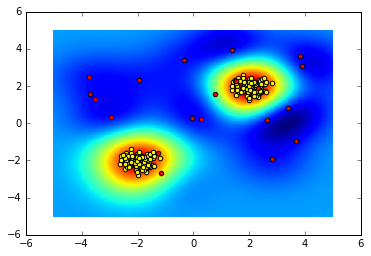

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

class_1 = np.random.uniform(low=-4, high=4, size=(20, 2))

X = 0.3 * np.random.randn(100, 2)
class_2 = np.r_[X + 2, X - 2]

labels = np.concatenate((np.ones(class_2.shape[0]), np.zeros(class_1.shape[0]) ))
training_data= np.concatenate((class_2, class_1))

clf = svm.SVC(kernel="rbf")
clf.fit(training_data, labels)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

plt.pcolormesh(xx, yy, Z.reshape(xx.shape))

b1 = plt.scatter(class_2[:, 0], class_2[:, 1], c='yellow')
c = plt.scatter(class_1[:, 0], class_1[:, 1], c='red')

plt.show()